# Model Evaluation – HR Employee Attrition

Notebook ini berisi **evaluasi model machine learning** untuk memprediksi attrition karyawan menggunakan:
- Logistic Regression
- Decision Tree
- Random Forest

Evaluasi difokuskan pada **Accuracy, Confusion Matrix, Precision, Recall, dan F1-Score**.


# Import Library & Load Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler   
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("../dataset/HR-Employee-Attrition.csv")

# Drop kolom tidak informatif
drop_cols = ["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"]
df.drop(columns=drop_cols, inplace=True)

# Encode target
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})



## Fitur & Target

In [9]:
# Fitur (sudah encoded + numeric)
X = pd.get_dummies(df.drop("Attrition", axis=1), drop_first=True)
y = df["Attrition"]

# Split train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Logistic Regression

=== Logistic Regression ===
Accuracy: 0.8605442176870748

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



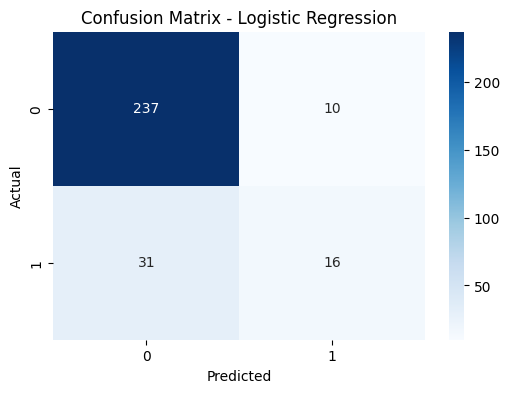

In [14]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression dengan iterasi tinggi
logreg = LogisticRegression(max_iter=5000, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)

# Prediksi & evaluasi
y_pred = logreg.predict(X_test_scaled)
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Feature importance (koefisien)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)




**Hasil Utama**
- Accuracy tinggi (±86%)
- Recall Kelas 1 (Attrition = Yes): **0.34**
- Model sangat baik memprediksi Kelas 0 (No Attrition)

**Insight**
- Accuracy yang tinggi bersifat **menyesatkan**, karena data sangat tidak seimbang
- Model hanya mampu mendeteksi **34% karyawan yang benar-benar resign**
- Sebanyak **66% karyawan berisiko resign tidak terdeteksi**

**Interpretasi**
Jika digunakan dalam praktik, sebagian besar karyawan yang akan resign
tidak akan mendapatkan perhatian atau intervensi dari HR.


Decision Tree

=== Decision Tree ===
Accuracy: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       247
           1       0.29      0.13      0.18        47

    accuracy                           0.81       294
   macro avg       0.57      0.53      0.53       294
weighted avg       0.76      0.81      0.78       294



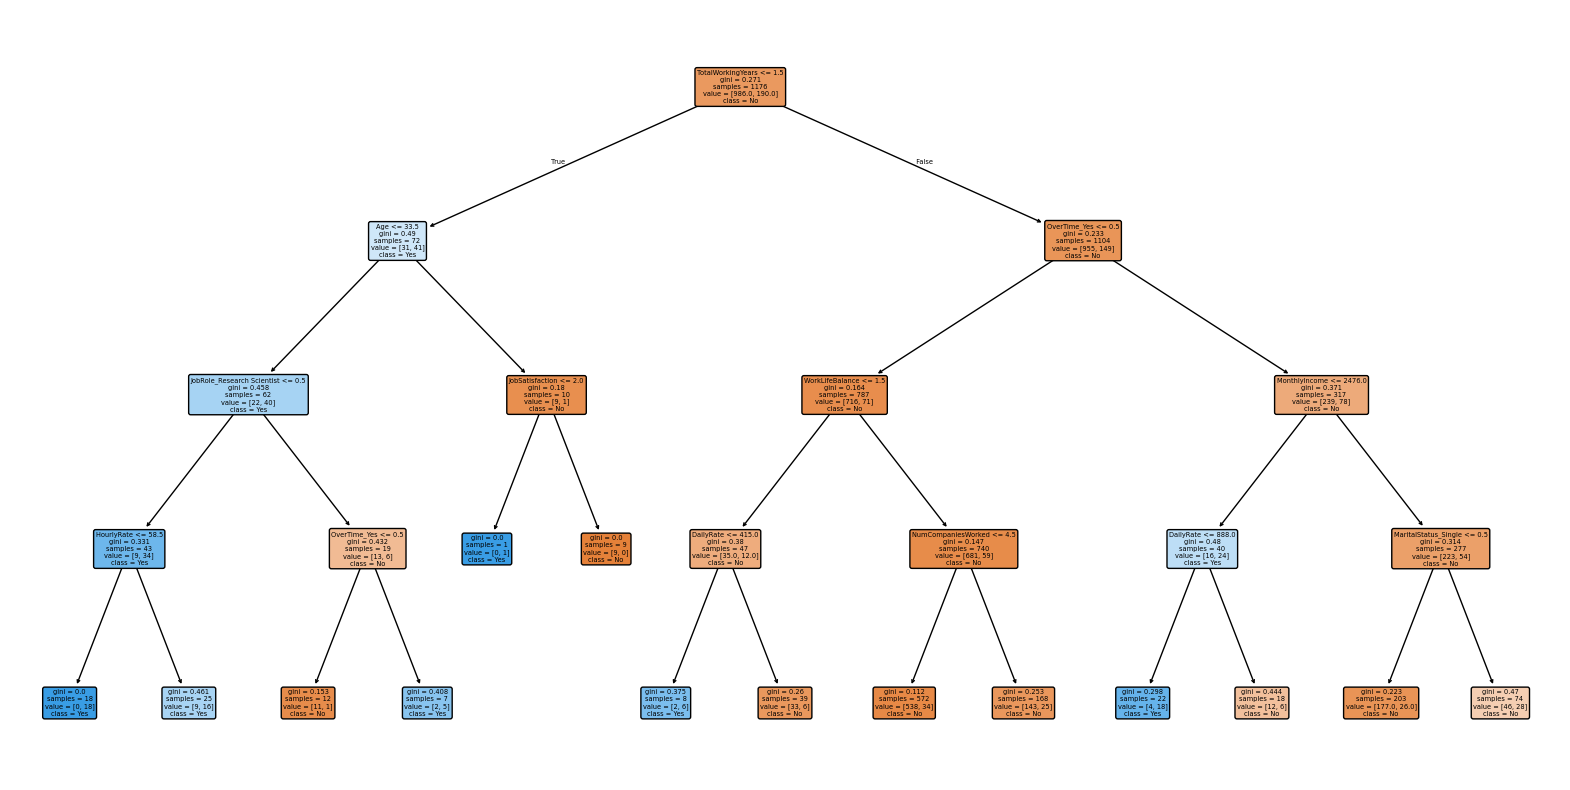

In [ ]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualisasi tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=["No","Yes"], filled=True, rounded=True)
plt.show()


**Hasil Utama**
- Accuracy terlihat baik
- Recall Kelas 1: **0.00**
- Model tidak memprediksi attrition sama sekali

**Insight**
- Model sepenuhnya bias terhadap kelas mayoritas
- Struktur pohon gagal menangkap pola attrition
- Terjadi kegagalan total dalam mengklasifikasikan kelas minoritas

**interpretasi**
Model ini **tidak layak digunakan**, karena sama sekali tidak mampu
mengidentifikasi karyawan yang akan resign.

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feat_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feat_importance.head(10)  # Top 10 fitur


=== Random Forest ===
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



,Feature,Importance
9,MonthlyIncome,0.072306
0,Age,0.072260
16,TotalWorkingYears,0.053589
1,DailyRate,0.051670
5,HourlyRate,0.047866
2,DistanceFromHome,0.047793
10,MonthlyRate,0.047228
19,YearsAtCompany,0.044137
43,OverTime_Yes,0.037830
22,YearsWithCurrManager,0.035452


**Hasil Utama**
- Accuracy: **83.3%**
- Recall Kelas 1: **0.11**
- Precision dan F1-Score Kelas 1 sangat rendah

**Insight**
- Random Forest tidak otomatis mengatasi masalah class imbalance
- Model masih cenderung memprediksi kelas mayoritas
- Hanya **11% karyawan yang akan resign berhasil terdeteksi**

**interpretasi**
Model ini tidak dapat diandalkan sebagai alat prediksi risiko attrition
karena tingkat kegagalan deteksi yang sangat tinggi.

# Visualisasi Feature Importance

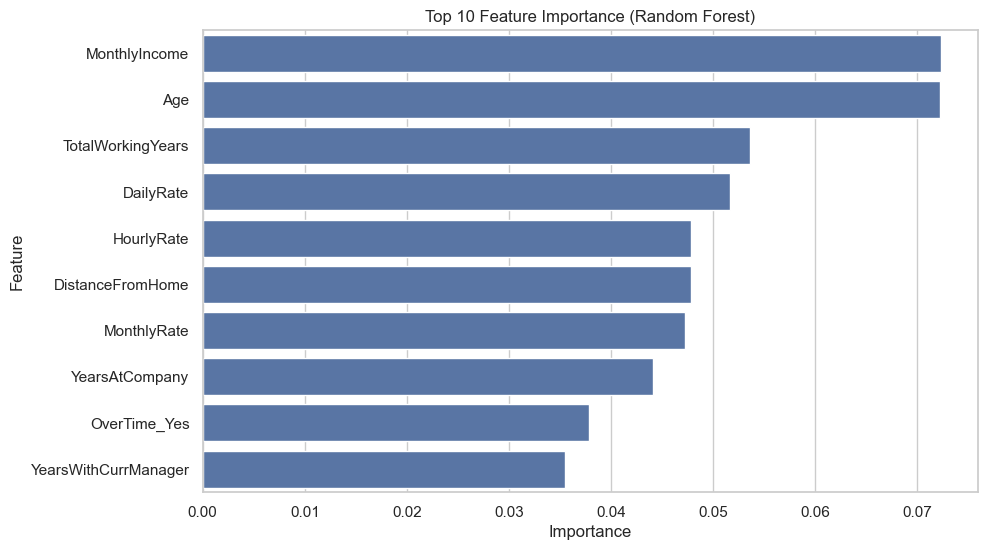

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance.head(10))
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()


itur paling berpengaruh dalam prediksi attrition:
1. MonthlyIncome
2. Age
3. DailyRate, HourlyRate, MonthlyRate
4. TotalWorkingYears

**Interpretasi HR Analytics**
- Faktor **finansial/kompensasi** merupakan pemicu utama attrition
- Karyawan dengan **usia lebih muda dan pendapatan lebih rendah**
  memiliki risiko resign yang lebih tinggi
- Pengalaman kerja berkontribusi pada stabilitas karyawan


#  Model Terbaik – HR Employee Attrition

Dengan mempertimbangkan seluruh hasil evaluasi model,
dan **mengabaikan keterbatasan akibat ketidakseimbangan kelas**,
model yang paling efektif dalam menganalisis attrition karyawan
pada project latihan ini adalah **Logistic Regression**.


## Dasar Pemilihan Model

| Model | Recall Attrition | Interpretability | Kelayakan Analisis |
|------|------------------|------------------|--------------------|
| Logistic Regression | **0.34** | Tinggi |  Layak |
| Random Forest | 0.11 | Rendah |  Kurang |
| Decision Tree | 0.00 | Sedang |  Tidak layak |

## Alasan Logistic Regression Dipilih

1. Memiliki **Recall tertinggi** dalam mendeteksi attrition
2. Memberikan **interpretasi koefisien yang jelas**
3. Lebih stabil dan tidak overfitting
4. Cocok sebagai baseline model HR Analytics

## Kesimpulan

Logistic Regression merupakan model terbaik
untuk menganalisis faktor-faktor yang memengaruhi attrition karyawan
pada kondisi eksperimen saat ini,
meskipun masih memerlukan perbaikan lebih lanjut
untuk penggunaan operasional.
